# Лабораторна робота №1

#### Тема: Аналіз одновимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

#### _Імпорт бібліотек_

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

import warnings
warnings.filterwarnings('ignore')

#### _Завдання 1_

Обраний часовий ряд: https://www.kaggle.com/datasets/rakannimer/air-passengers

Період спостережень: Січень 1949 - Грудень 1960

Кількість значень: 144 спостереження

Одиниці вимірювання: Тисячі пасажирів ($10^3$)

Типи стовпців: Month (datetime), Passengers (int64)

#### _Завдання 2_

In [83]:
df = pd.read_csv("dataset/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Мінімальне значення - 1949-11 104

Максимальне значення - 1960-07 622

Середнє значення - 280.3

Медіана - 265.5

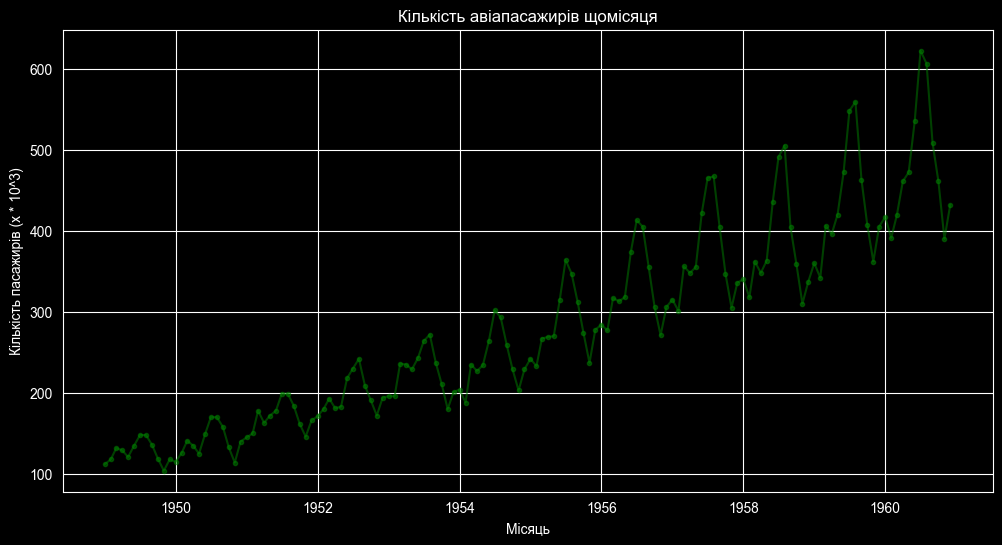

In [84]:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

На графіку чітко видно стійкий тренд протягом усього періоду (1949–1960), що свідчить про загальне зростання обсягів авіаперевезень.

Спостерігаються повторювані сезонні коливання з піками влітку та спадами в осінньо-зимовий період.

Також можна побачити, що розмах сезонних коливань зростає разом із трендом.

У висновку, можна сказати, що ряд має висхідний тренд та певну сезонність

#### _Завдання 3_

Обраний ряд не має пропусків, тому вони будуть створені штучно (15% від розміру датасету)

In [85]:
if os.path.exists('dataset/AirPassengers_with_gaps.csv'):
    n_missing = int(len(df) * 0.15)

    np.random.seed(42)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)

    df_with_gaps = df.copy()
    df_with_gaps.loc[missing_indices, '#Passengers'] = np.nan

    df_with_gaps.to_csv('dataset/AirPassengers_with_gaps.csv', index=False)
else:
    df_with_gaps = pd.read_csv('dataset/AirPassengers.csv')

In [86]:
df_with_gaps

,Month,#Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


Кількість значень - 144

Пропусків - 21

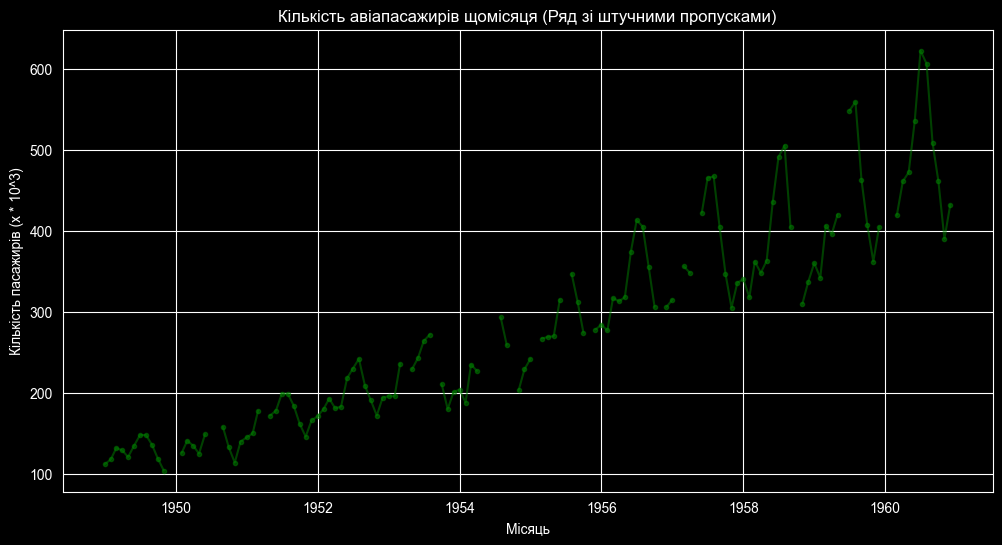

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df_with_gaps['Month'], df_with_gaps['#Passengers'], marker='.', linestyle='-', color='g', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі штучними пропусками)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 1: Лінійна інтерполяція

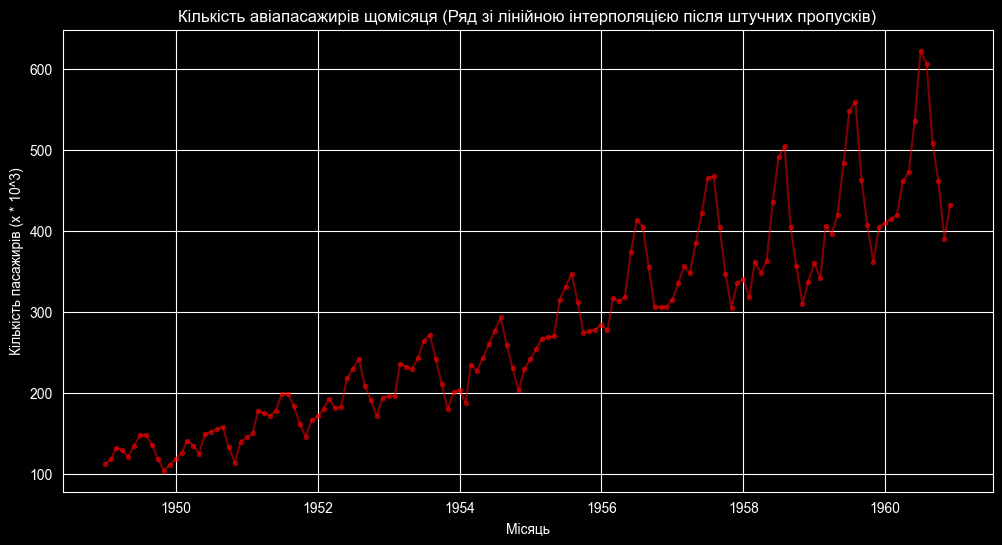

In [88]:
df_interpolated = df_with_gaps.copy()
df_interpolated['#Passengers'] = df_interpolated['#Passengers'].interpolate(method='linear')

plt.figure(figsize=(12, 6))
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], marker='.', linestyle='-', color='r', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі лінійною інтерполяцією після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Метод 2: Попереднє спостереження

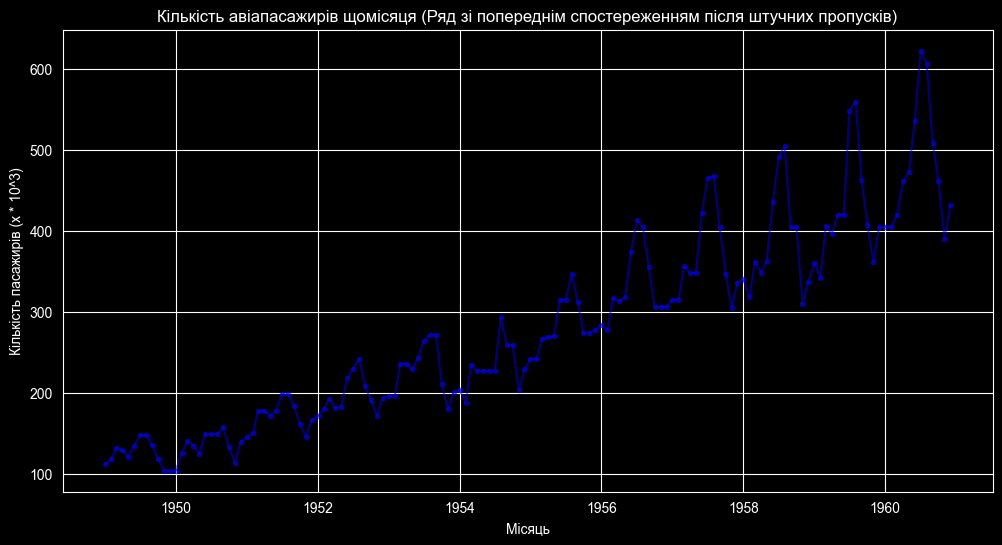

In [89]:
df_ffill = df_with_gaps.copy()
df_ffill['#Passengers'] = df_ffill['#Passengers'].ffill()

plt.figure(figsize=(12, 6))
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], marker='.', linestyle='-', color='b', alpha=0.5)
plt.title('Кількість авіапасажирів щомісяця (Ряд зі попереднім спостереженням після штучних пропусків)')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)

Порівняння оригінального та заповнених рядів

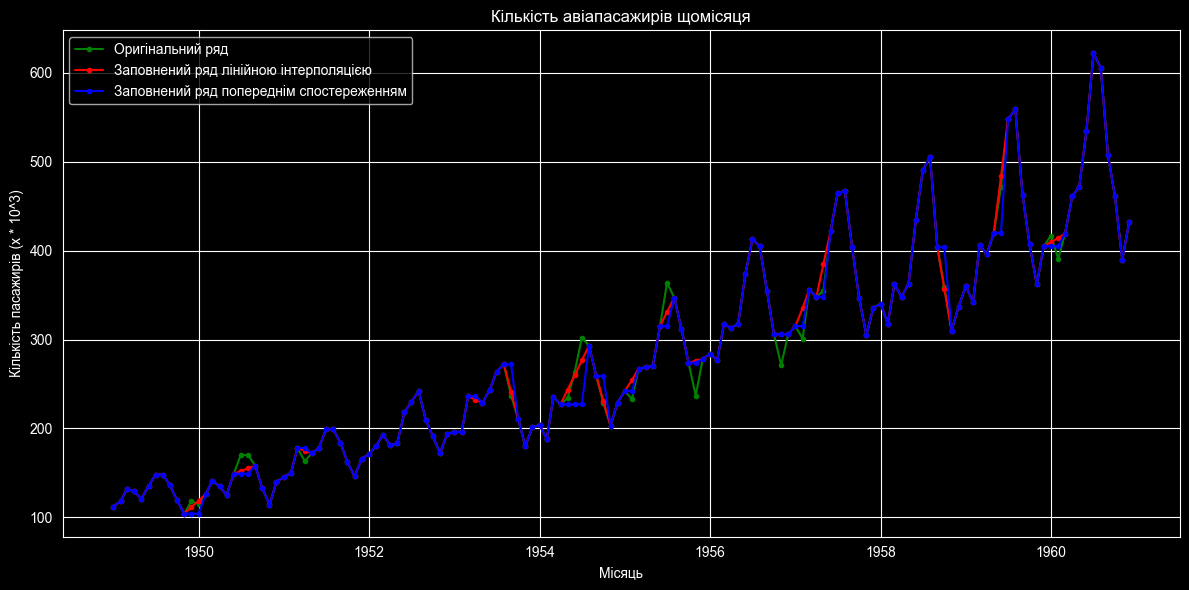

In [90]:
df['Month'] = pd.to_datetime(df['Month'])
df_interpolated['Month'] = pd.to_datetime(df_interpolated['Month'])
df_ffill['Month'] = pd.to_datetime(df_ffill['Month'])

plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['#Passengers'], label='Оригінальний ряд', marker='.', linestyle='-', color='g', alpha=1)
plt.plot(df_interpolated['Month'], df_interpolated['#Passengers'], label='Заповнений ряд лінійною інтерполяцією', marker='.', linestyle='-', color='r', alpha=1)
plt.plot(df_ffill['Month'], df_ffill['#Passengers'], label='Заповнений ряд попереднім спостереженням', marker='.', linestyle='-', color='b', alpha=1)

plt.title('Кількість авіапасажирів щомісяця')
plt.xlabel('Місяць')
plt.ylabel('Кількість пасажирів (x * 10^3)')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [91]:
df_union = pd.concat([df, df_interpolated['#Passengers'].rename('Interpolated Passengers'), df_ffill['#Passengers'].rename('Forward Fill Passengers')], axis=1)
df_union

,Month,#Passengers,Interpolated Passengers,Forward Fill Passengers
0,1949-01-01,112,112.0,112.0
1,1949-02-01,118,118.0,118.0
2,1949-03-01,132,132.0,132.0
3,1949-04-01,129,129.0,129.0
4,1949-05-01,121,121.0,121.0
...,...,...,...,...
139,1960-08-01,606,606.0,606.0
140,1960-09-01,508,508.0,508.0
141,1960-10-01,461,461.0,461.0
142,1960-11-01,390,390.0,390.0


#### _Завдання 4_

**Графічна перевірка викидів (boxplot)**

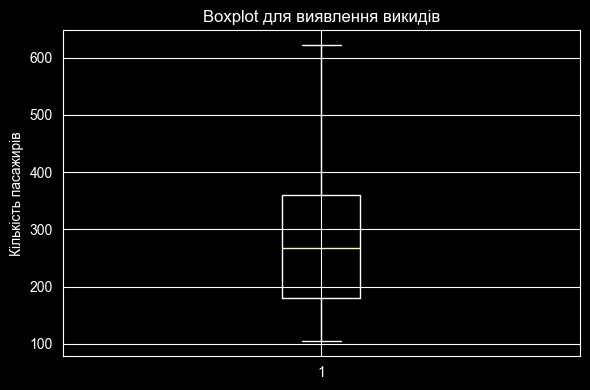

In [92]:
plt.figure(figsize=(6,4))
plt.boxplot(df_interpolated['#Passengers'])
plt.title("Boxplot для виявлення викидів")
plt.ylabel("Кількість пасажирів")
plt.grid(True)
plt.tight_layout()

**Статистична перевірка (метод IQR)**

In [93]:
Q1 = df_interpolated['#Passengers'].quantile(0.25)
Q3 = df_interpolated['#Passengers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_interpolated[
    (df_interpolated['#Passengers'] < lower_bound) |
    (df_interpolated['#Passengers'] > upper_bound)
]

print(f"Кількість викидів: {len(outliers)}")
outliers

Кількість викидів: 0


,Month,#Passengers


Часовий ряд перевірено методом міжквартильного розмаху (IQR). Розраховані граничні значення не виявили спостережень за межами допустимого інтервалу. Викиди відсутні

**Згладжування (ковзне середнє)**

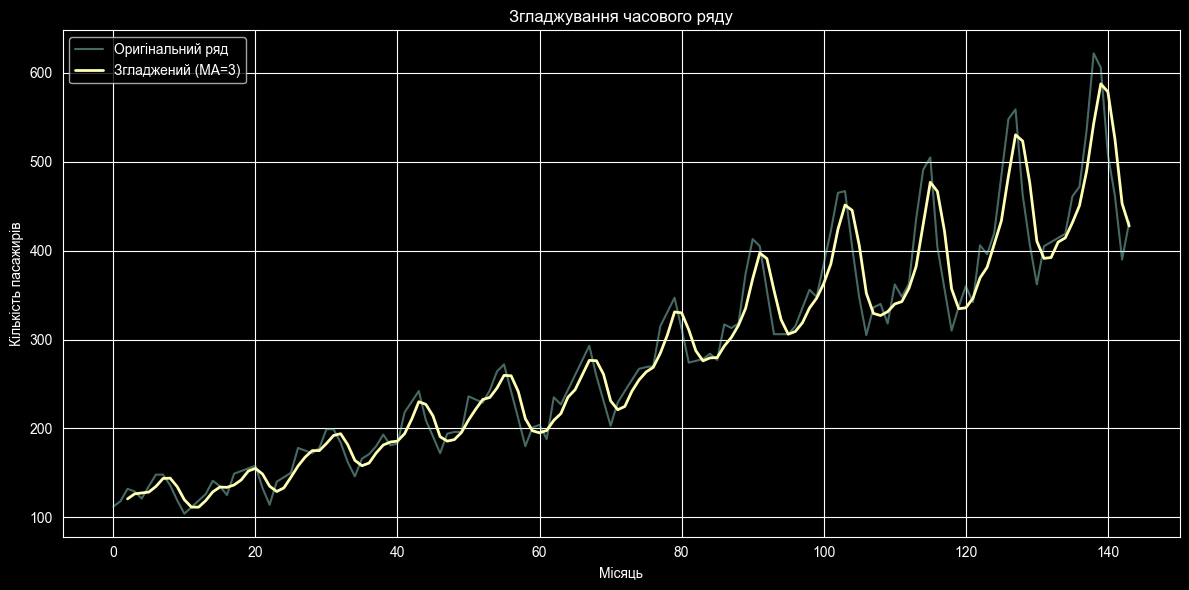

In [94]:
df_no_outliers = df_interpolated.copy()
df_smoothed = df_no_outliers.copy()
df_smoothed['Smoothed'] = df_smoothed['#Passengers'].rolling(window=3).mean()

plt.figure(figsize=(12,6))

plt.plot(df_no_outliers.index, df_no_outliers['#Passengers'], label='Оригінальний ряд', alpha=0.5)
plt.plot(df_smoothed.index, df_smoothed['Smoothed'], label='Згладжений (MA=3)', linewidth=2)

plt.title("Згладжування часового ряду")
plt.xlabel("Місяць")
plt.ylabel("Кількість пасажирів")
plt.legend()
plt.grid(True)
plt.tight_layout()

Застосування ковзного середнього дозволило усунути високочастотні коливання та зробити часовий ряд більш структурованим для подальшого аналізу. Після згладжування чітко простежується зростаючий тренд та виражена сезонність, що свідчить про нестаціонарний характер процесу.

#### _Завдання 5_

**Нормалізація (Min–Max Scaling)**

In [95]:
df_normalized = df_smoothed.copy()

min_val = df_normalized['#Passengers'].min()
max_val = df_normalized['#Passengers'].max()

df_normalized['Normalized'] = (
    (df_normalized['#Passengers'] - min_val) /
    (max_val - min_val)
)

df_normalized

,Month,#Passengers,Smoothed,Normalized
0,1949-01-01,112.0,NaN,0.015444
1,1949-02-01,118.0,NaN,0.027027
2,1949-03-01,132.0,120.666667,0.054054
3,1949-04-01,129.0,126.333333,0.048263
4,1949-05-01,121.0,127.333333,0.032819
...,...,...,...,...
139,1960-08-01,606.0,587.666667,0.969112
140,1960-09-01,508.0,578.666667,0.779923
141,1960-10-01,461.0,525.000000,0.689189
142,1960-11-01,390.0,453.000000,0.552124


**Стандартизація (Z-score)**

In [96]:
df_standardized = df_smoothed.copy()

mean_val = df_standardized['#Passengers'].mean()
std_val = df_standardized['#Passengers'].std()

df_standardized['Standardized'] = ((df_standardized['#Passengers'] - mean_val) / std_val)

df_standardized.head()

,Month,#Passengers,Smoothed,Standardized
0,1949-01-01,112.0,NaN,-1.404808
1,1949-02-01,118.0,NaN,-1.354957
2,1949-03-01,132.0,120.666667,-1.238640
3,1949-04-01,129.0,126.333333,-1.263565
4,1949-05-01,121.0,127.333333,-1.330032


**Побудова графіка**

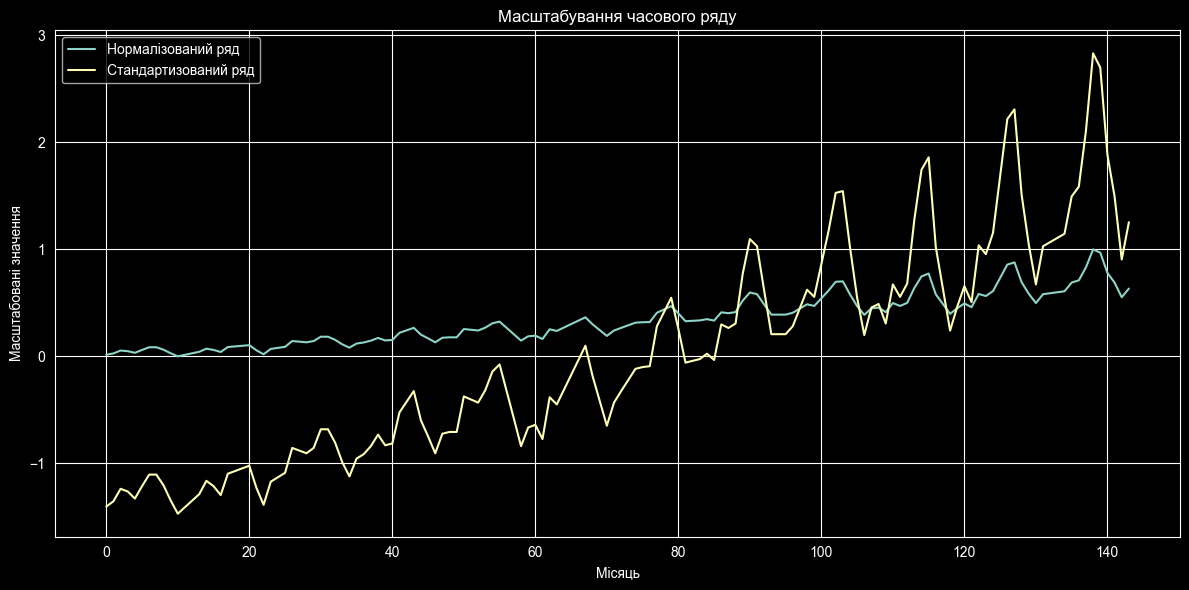

In [97]:
plt.figure(figsize=(12,6))

plt.plot(df_normalized.index, df_normalized['Normalized'], label='Нормалізований ряд')
plt.plot(df_standardized.index, df_standardized['Standardized'], label='Стандартизований ряд')

plt.title("Масштабування часового ряду")
plt.xlabel("Місяць")
plt.ylabel("Масштабовані значення")
plt.legend()
plt.grid(True)
plt.tight_layout()

Після масштабування зберігається характер зростаючого тренду та сезонна структура ряду. Нормалізація забезпечує приведення значень до обмеженого діапазону, тоді як стандартизація дозволяє оцінювати відносні відхилення від середнього рівня процесу. Отримані перетворення є підготовчим етапом для подальшого статистичного аналізу.

#### _Завдання 7_

Для візуальної оцінки часового ряду побудуємо ACF та PACF.
* ACF дозволяє виявити сезонність та тренд
* PACF допомагає визначити порядок авторегресії (AR)

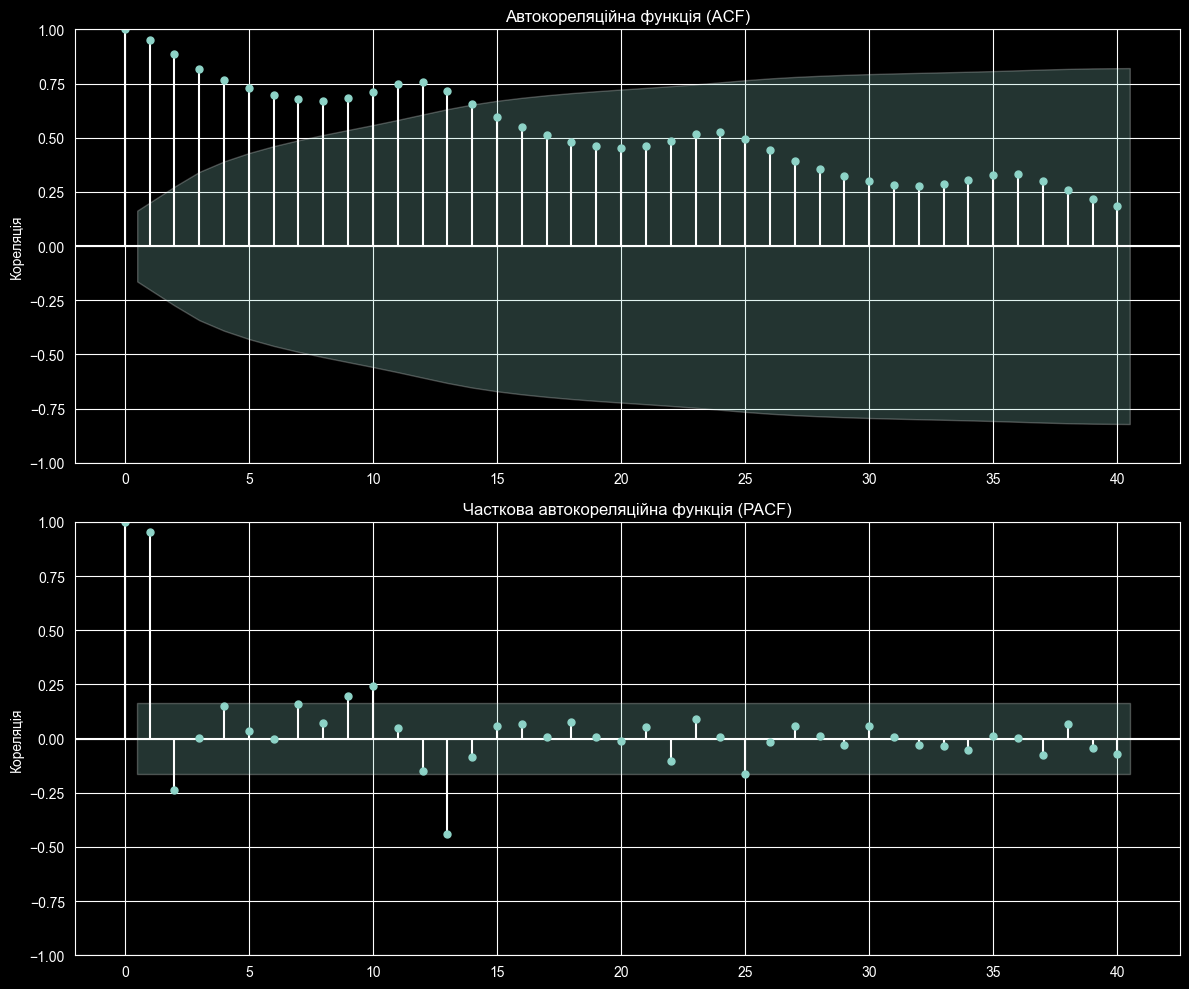

In [98]:
ts_data = df_interpolated['#Passengers']
fig, ax = plt.subplots(2, 1, figsize=(12, 10))


plot_acf(ts_data, lags=40, ax=ax[0])
ax[0].set_title('Автокореляційна функція (ACF)')
ax[0].set_ylabel('Кореляція')

plot_pacf(ts_data, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('Часткова автокореляційна функція (PACF)')
ax[1].set_ylabel('Кореляція')

plt.tight_layout()

Статистичний аналіз стаціонарності

Для перевірки властивостей ряду використовуємо набір тестів:

1.  ADF (Augmented Dickey-Fuller): Перевіряє наявність одиничного кореня.
2.  KPSS (Kwiatkowski-Phillips-Schmidt-Shin): Перевіряє стаціонарність відносно тренду.
3.  Shapiro-Wilk: Перевіряє розподіл на нормальність (Гаусівський розподіл).
4.  Ljung-Box: Перевіряє наявність автокореляції (чи є ряд "білим шумом").

In [99]:
def run_all_tests(series):
    series = series.dropna()

    print("\nТест Дікі-Фуллера (ADF)")
    adf_res = adfuller(series)
    print(f"Statistic: {adf_res[0]:.4f}, p-value: {adf_res[1]:.4f}")
    if adf_res[1] < 0.05:
        print("Ряд стаціонарний")
    else:
        print("Ряд нестаціонарний")

    # 2. Тест KPSS
    print("\nТест KPSS")
    kpss_res = kpss(series, regression='c', nlags="auto")
    print(f"Statistic: {kpss_res[0]:.4f}, p-value: {kpss_res[1]:.4f}")
    if kpss_res[1] < 0.05:
        print("Ряд нестаціонарний")
    else:
        print("Ряд стаціонарний")

    # 3. Тест Шапіро-Вілка (Нормальність)
    print("\nТест Шапіро-Вілка (Нормальність)")
    shapiro_res = shapiro(series)
    print(f"Statistic: {shapiro_res[0]:.4f}, p-value: {shapiro_res[1]:.4f}")
    if shapiro_res[1] < 0.05:
        print("Розподіл не нормальний")
    else:
        print("Розподіл нормальний")

    # 4. Тест Льюнга-Бокса (Автокореляція)
    print("\nТест Льюнга-Бокса (Білий шум)")
    lb_res = acorr_ljungbox(series, lags=[10], return_df=True)
    lb_pvalue = lb_res['lb_pvalue'].values[0]
    print(f"p-value (lag 10): {lb_pvalue:.4f}")
    if lb_pvalue < 0.05:
        print("Є автокореляція (структура присутня)")
    else:
        print("Автокореляція відсутня (білий шум)")

Запуск 4 тестів для інтерпольованого ряду

In [100]:
ts_data = df_interpolated['#Passengers']
run_all_tests(ts_data)


Тест Дікі-Фуллера (ADF)
Statistic: 0.7639, p-value: 0.9910
Ряд нестаціонарний

Тест KPSS
Statistic: 1.6517, p-value: 0.0100
Ряд нестаціонарний

Тест Шапіро-Вілка (Нормальність)
Statistic: 0.9535, p-value: 0.0001
Розподіл не нормальний

Тест Льюнга-Бокса (Білий шум)
p-value (lag 10): 0.0000
Є автокореляція (структура присутня)


Диференціювання для усунення тренду та запуск 4 тестів для обробленого ряду

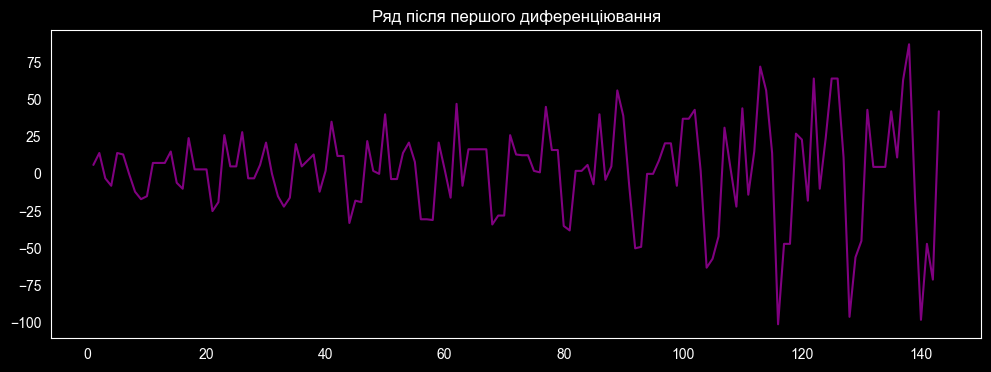


Тест Дікі-Фуллера (ADF)
Statistic: -2.6030, p-value: 0.0924
Ряд нестаціонарний

Тест KPSS
Statistic: 0.0248, p-value: 0.1000
Ряд стаціонарний

Тест Шапіро-Вілка (Нормальність)
Statistic: 0.9678, p-value: 0.0019
Розподіл не нормальний

Тест Льюнга-Бокса (Білий шум)
p-value (lag 10): 0.0000
Є автокореляція (структура присутня)


In [101]:
ts_diff = ts_data.diff().dropna()

plt.figure(figsize=(12, 4))
plt.plot(ts_diff, color='purple')
plt.title('Ряд після першого диференціювання')
plt.grid()
plt.show()

run_all_tests(ts_diff)

### Висновки до п. 7
За результатами проведеного комплексу статистичних тестів (ADF, KPSS, Shapiro-Wilk, Ljung-Box) встановлено наступне:

**1. Початковий ряд (Інтерпольований):**
* Тест Дікі-Фуллера (ADF): _p-value > 0.05_. Нульова гіпотеза не відхиляється, ряд є нестаціонарним.
* Тест KPSS: _p-value < 0.05_. Нульова гіпотеза про стаціонарність відхиляється.
* Графічний аналіз: Підтверджує наявність вираженого тренду та мультиплікативної сезонності.

**2. Ряд після першого диференціювання:**
* Тест Дікі-Фуллера (ADF): _p-value < 0.05_. Ряд став стаціонарним (тренд усунуто).
* Тест KPSS: Отримано результат _p-value > 0.1_ (про що свідчить попередження "Actual p-value is greater"). Це підтверджує, що ряд є стаціонарним відносно тренду.
* Тест Льюнга-Бокса: Вказує на наявність залишкової автокореляції, що є наслідком збереження сезонної структури даних.

**Загальний висновок:**
Застосування диференціювання першого порядку дозволило перетворити нестаціонарний процес на стаціонарний шляхом усунення лінійного тренду. Ряд готовий до подальшого моделювання, проте наявність сезонності вимагає використання моделей класу SARIMA (з сезонною компонентою) для побудови якісного прогнозу.